In [16]:
import pandas as pd

# Read the CSV file into a DataFrame
df = pd.read_csv('weiterbildung_csv2.csv')

# Display the first few rows of the DataFrame
print(df.head())


   unterrichtsform_id unterrichtsform_bezeichnung  unterrichtszeit_id   
0                 302           Combined Learning                   2  \
1                 302           Combined Learning                   1   
2                 302           Combined Learning                   2   
3                 301            Blended Learning                   2   
4                 301            Blended Learning                   1   

  unterrichtszeit_bezeichnung  dauer_id               dauer_bezeichnung   
0                    Teilzeit         7     mehr als 1 Jahr bis 2 Jahre  \
1                    Vollzeit         3    mehr als 1 Woche bis 1 Monat   
2                    Teilzeit         4   mehr als 1 Monat bis 3 Monate   
3                    Teilzeit         4   mehr als 1 Monat bis 3 Monate   
4                    Vollzeit         5  mehr als 3 Monate bis 6 Monate   

   angebot_id                                      angebot_titel   
0    14622965                         Tech

                    Region Region Code  Weiterbildung_Count
0        Baden-Württemberg         BAW                  712
1                   Bayern         BAY                  347
2                   Berlin         BER                 3152
3              Brandenburg         BRA                    9
4                   Bremen         BRE                   30
5              Deutschland           -                    6
6                  Hamburg         HAM                  385
7                   Hessen         HES                 1909
8   Mecklenburg-Vorpommern         MBV                    9
9            Niedersachsen         NDS                  501
10     Nordrhein-Westfalen         NRW                 2479
11         Rheinland-Pfalz         RPF                   51
12                Saarland         SAA                    6
13                 Sachsen         SAC                  263
14          Sachsen-Anhalt         SAN                   78
15      Schleswig-Holstein         SLH  

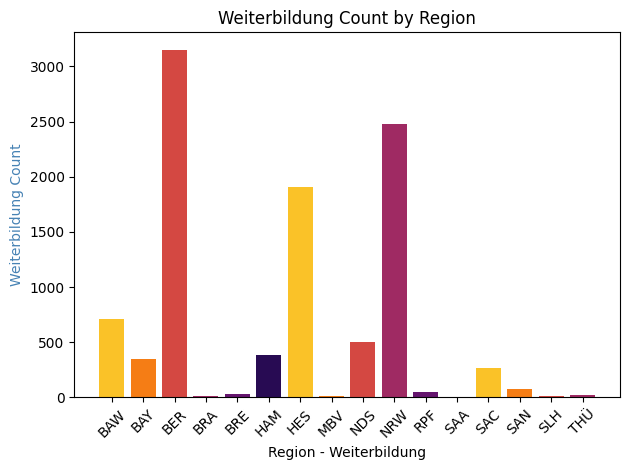

In [83]:
import matplotlib.pyplot as plt
import seaborn as sns

# group by region 
region_grouped_data = df.groupby([
    'bildungsanbieter_ortStrasse_land_name',
    'bildungsanbieter_ortStrasse_land_bundeslandCode'
    ])['angebot_titel'].count().reset_index(name='Weiterbildung_Count')
region_grouped_data.rename(columns={'bildungsanbieter_ortStrasse_land_name': 'Region', 'bildungsanbieter_ortStrasse_land_bundeslandCode': 'Region Code'}, inplace=True)

print(region_grouped_data)
region_grouped_data= region_grouped_data.drop([5])

# Create a list of colors for the bars
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']

# Create a bar plot
fig, ax1 = plt.subplots()

# Plot the count of weiterbildung
ax1.bar(region_grouped_data['Region Code'], region_grouped_data['Weiterbildung_Count'],  color=sns.color_palette("inferno_r"), label=region_grouped_data['Region Code'])

ax1.set_xlabel('Region - Weiterbildung')
ax1.set_ylabel('Weiterbildung Count', color='steelblue')

plt.title('Weiterbildung Count by Region')
plt.xticks(rotation=45)
plt.tight_layout()

# Display the plot
plt.show()


In [18]:
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point
import contextily as ctx
from keplergl import KeplerGl

df2 = df[['bildungsanbieter_ortStrasse_land_name', 'koordinaten_lat', 'koordinaten_lon']]

# Read a GeoDataFrame
world_gdf = gpd.read_file(
    gpd.datasets.get_path('naturalearth_lowres')
)

# Create Point geometries
geometry = [Point(lon, lat) for lon, lat in zip(df2['koordinaten_lon'], df2['koordinaten_lat'])]

# Create a GeoDataFrame
gdf = gpd.GeoDataFrame(df2, geometry=geometry, crs='EPSG:4326')

# Filter data for Germany
germany_boundary = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
germany_boundary = germany_boundary[germany_boundary['name'] == 'Germany']
gdf = gdf[gdf.within(germany_boundary.unary_union)]

custom_config = {
  "version": "v1",
  "config": {
    "visState": {
      "filters": [],
      "layers": [],
      "interactionConfig": {}
    },
    "mapState": {
      "latitude": 51.1657,
      "longitude": 10.4515,
      "zoom": 5,
      "isSplit": False
    },
    "mapStyle": {
      "styleType": "muted_night",
      "topLayerGroups": {},
      "visibleLayerGroups": {
        "label": True,
        "road": True,
        "border": True,
        "building": True,
        "water": True,
        "land": True
      }
    }
  }
}

# Create a Kepler.gl instance
map_1 = KeplerGl(height=800, config=custom_config)

# Add data to Kepler.gl instance
map_1.add_data(data=gdf, name='Germany Data')

# Display the Kepler.gl map
map_1
map_1.save_to_html()

# plt.scatter(df['koordinaten_lon'], df['koordinaten_lat'], color='b', marker='o')



/var/folders/x7/5php5bs9399c34w93tdfd7680000gp/T/ipykernel_72801/1505264473.py:11: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  gpd.datasets.get_path('naturalearth_lowres')
/var/folders/x7/5php5bs9399c34w93tdfd7680000gp/T/ipykernel_72801/1505264473.py:21: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  germany_boundary = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


User Guide: https://docs.kepler.gl/docs/keplergl-jupyter
Map saved to keplergl_map.html!


/var/folders/x7/5php5bs9399c34w93tdfd7680000gp/T/ipykernel_72801/448985332.py:21: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df3, x='Weiterbildung_Count', y='bildungsanbieter_ortStrasse_land_name', hue="unterrichtszeit_bezeichnung",ci = None)


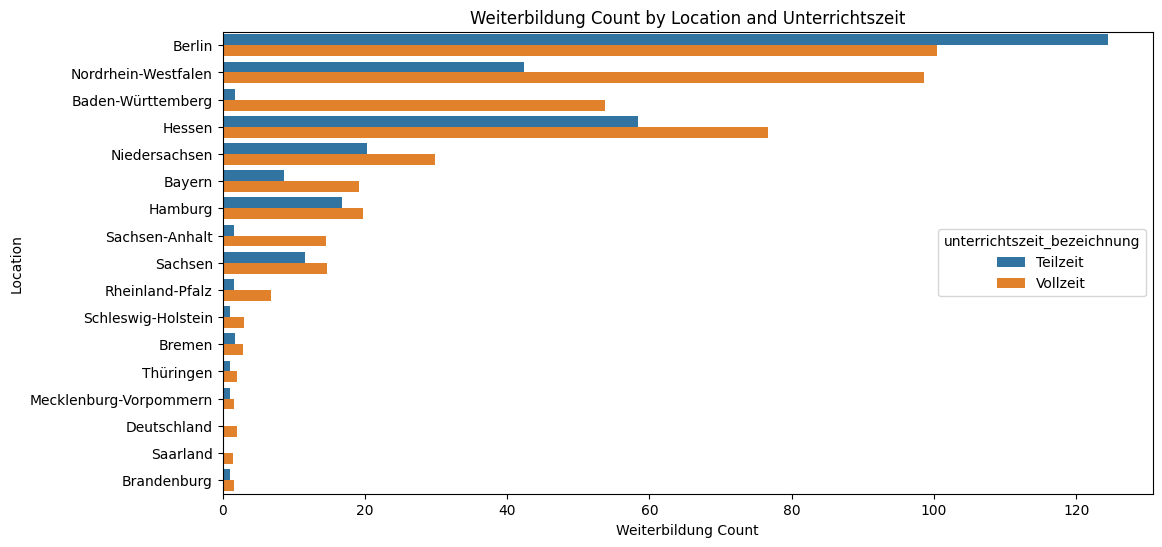

In [62]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib as mpl
import numpy as np
import seaborn as sns

df3 = df.groupby([
    'unterrichtsform_bezeichnung',
    'unterrichtszeit_bezeichnung',
    'dauer_id',
    'bildungsanbieter_ortStrasse_land_name',
    ])['angebot_titel'].count().reset_index(name='Weiterbildung_Count')
cols = [
    'unterrichtsform_bezeichnung', 
    'unterrichtszeit_bezeichnung', 
    'dauer_bezeichnung', 
    'bildungsanbieter_ortStrasse_land_name', 
    ]
df3 = df3.sort_values(by='Weiterbildung_Count', ascending=False)
# Create a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(data=df3, x='Weiterbildung_Count', y='bildungsanbieter_ortStrasse_land_name', hue="unterrichtszeit_bezeichnung",ci = None)
plt.xlabel('Weiterbildung Count')
plt.ylabel('Location')
plt.title('Top regions Weiterbildung count according to Unterrichtszeit')
plt.show()

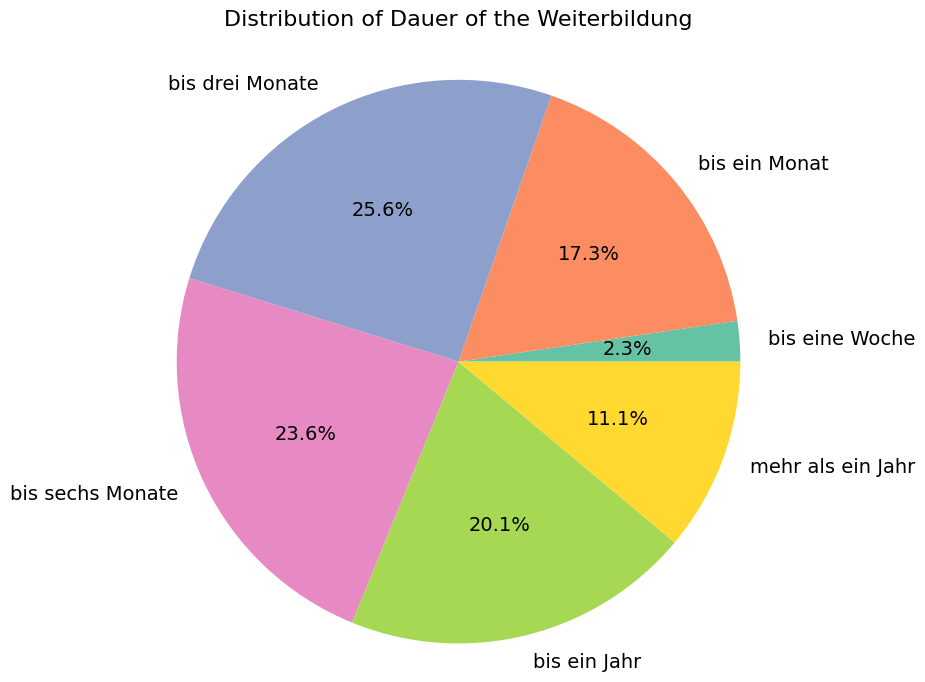

In [79]:
import matplotlib.pyplot as plt
import numpy as np

dauer_id = np.array([2,3,4,5,6,7])
# 0=Auf Anfrage, 1,2=bis eine Woche, 1,2,3=bis ein Monat, 1,2,3,4=bis drei Monate, 1,2,3,4,5=bis sechs Monate, 1,2,3,4,5,6=bis ein Jahr, 7,8,9=mehr als ein Jahr

dauer_labels = ["bis eine Woche","bis ein Monat","bis drei Monate",
                "bis sechs Monate","bis ein Jahr","mehr als ein Jahr"]
explode = (0, 0.1, 0, 0.1, 0, 0.1) 
df4 = df3.groupby(['dauer_id']).sum()
plt.figure(figsize=(8,8))

df4 = df4.drop([0, 1, 8, 9])
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b']

plt.pie(df4["Weiterbildung_Count"], labels = dauer_labels,
        autopct = '%1.1f%%', textprops={'fontsize':14},
    colors=sns.color_palette('Set2'))

plt.title(label='Distribution of Dauer of the Weiterbildung',fontdict={"fontsize":16},
    pad=20)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()